In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [2]:
import umodel as unf

# Observed yields
d1 = np.array([ 90, 110])
d2 = np.array([170,  30])
Ds = [d1, d2]

# Response matrix
r1 = np.diag([1, 1])
r2 = np.diag([1, 1])
Rs = [r1, r2]

# Correlation matrix
corr = np.diag([1, 1, 1, 1])

# Build the unfolding model
m = unf.model(Ds, Rs, corr)

# Tested truth bin content
b1 = np.array([ 90, 110])
b2 = np.array([170,  30])
Bs = [b1, b2]
print(m.NLL(Bs))

0.0


In [3]:
truthBins = np.random.random(size=(1000, 4)) * 200
B1s, B2s = truthBins[:, :2], truthBins[:, 2:]
NLLs = [m.NLL([b1, b2]) for b1, b2 in zip(B1s, B2s)]

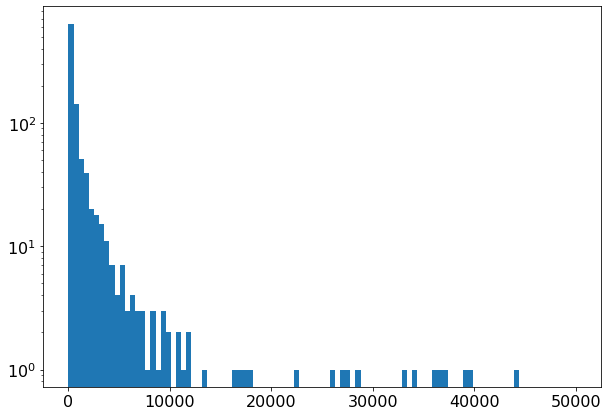

In [4]:
plt.hist(NLLs, bins=np.linspace(0, 50000, 100), log=True);

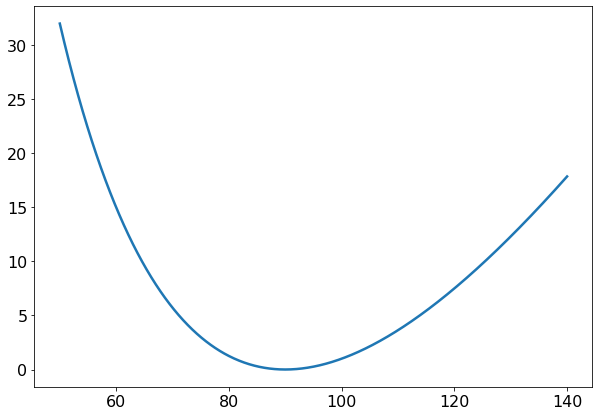

In [5]:
b1Scan = np.linspace(50, 140, 1000)
NLLs = [m.NLL( [np.array([b1, 110]), np.array([170, 30])] ) for b1 in b1Scan]
plt.plot(b1Scan, NLLs);

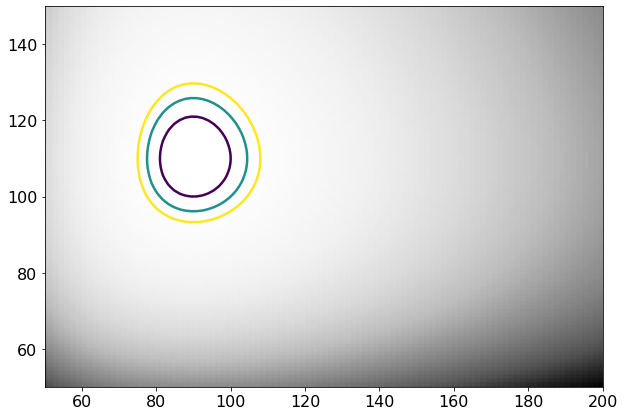

In [6]:
# 2D scan of first 2 first bins
b1s = np.linspace(50, 200, 100)
b2s = np.linspace(50, 150, 100)

# Plotting of 1/2/3-sigma contour
points = np.array(np.meshgrid(b1s, b2s)).T.reshape(-1, 2)
Xs, Ys = points[:, 0], points[:, 1]
NLLs = np.array([m.NLL([np.array([b1, b2]), np.array([170, 30])]) for b1, b2 in zip(Xs, Ys)])        
XX, YY = np.meshgrid(b1s, b2s)
nn = NLLs.reshape(len(b1s), len(b2s)).T
ref = nn.min()
plt.contour(XX, YY, nn, levels=[ref+1, ref+2, ref+3])
plt.scatter(Xs, Ys, c=NLLs, cmap='Greys');

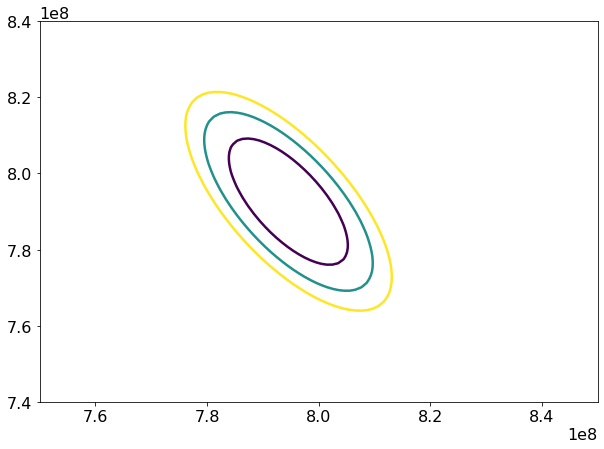

In [7]:
# Observed yields
d1 = np.array([ 24636.523496581398, 14878.040254917081, 14890.266212322726, 24652.683463182377])
d2 = np.array([ 24659.23571036971, 14874.62653317551, 14828.540341379041, 24695.110842079284 ])
Ds = [d1, d2]

# Response matrix
r1 = np.array([
    [ 1.891022879949602e-05, 4.27949708094587e-06, 2.241322476197443e-06, 4.127351215117905e-06 ],
    [ 5.307771667060071e-06, 8.03574122224043e-06, 4.181443309378539e-06, 2.670984389980063e-06 ],
    [ 2.681632337210782e-06, 4.18181658103819e-06, 8.073637985764411e-06, 5.312662218228923e-06 ],
    [ 4.126559922165243e-06, 2.25902597768202e-06, 4.275620447085394e-06, 1.893211626936133e-05 ],
])
r2 = np.array([
    [ 1.89057527947717e-05, 4.236538496210918e-06, 2.245997918834765e-06, 4.143403053537583e-06 ],
    [ 5.34828656173058e-06, 8.088569986431556e-06, 4.157881897814714e-06, 2.684560674734903e-06 ],
    [ 2.69424628872622e-06, 4.176357847462045e-06, 8.054020078883517e-06, 5.333669088472362e-06 ], 
    [ 4.09911187449855e-06, 2.252559562606424e-06, 4.238418098183349e-06, 1.893191218541362e-05 ],
])
Rs = [r1, r2]

# Correlation matrix
corr = np.diag([1]*8)

# Create the model
m = unf.model(Ds, Rs, corr)

# Tested truth bin content
B1ref = m.Bs[0]
B2ref = m.Bs[1]

# 2D scan of first 2 first bins
b1s = np.linspace(0.75e9, 0.85e9, 100)
b2s = np.linspace(0.74e9, 0.84e9, 100)

# Plotting of 1/2/3-sigma contour
points = np.array(np.meshgrid(b1s, b2s)).T.reshape(-1, 2)
Xs, Ys = points[:, 0], points[:, 1]
NLLs = np.array([m.NLL([np.array([b1, b2, B1ref[2], B1ref[3]]), B2ref]) for b1, b2 in zip(Xs, Ys)])        
XX, YY = np.meshgrid(b1s, b2s)
nn = NLLs.reshape(len(b1s), len(b2s)).T
ref = nn.min()
plt.contour(XX, YY, nn, levels=[ref+1, ref+2, ref+3]);

In [8]:
a = np.array([4, 4, 4, 4])
Nstart = [0] + list(a[:-1].cumsum())
Nend   = list(a.cumsum())
print(Nstart, Nend)

[0, 4, 8, 12] [4, 8, 12, 16]


In [9]:
# Perform unfolding by NLL minimzation
Bunf, nllMin = m.unfold()
print(Bunf[0])
print(Bunf[1])
print(nllMin)

[7.94558444e+08 7.92562301e+08 7.92354207e+08 7.94778021e+08]
[7.94973897e+08 7.92206249e+08 7.92138404e+08 7.94926765e+08]
1.964086824616258e-27


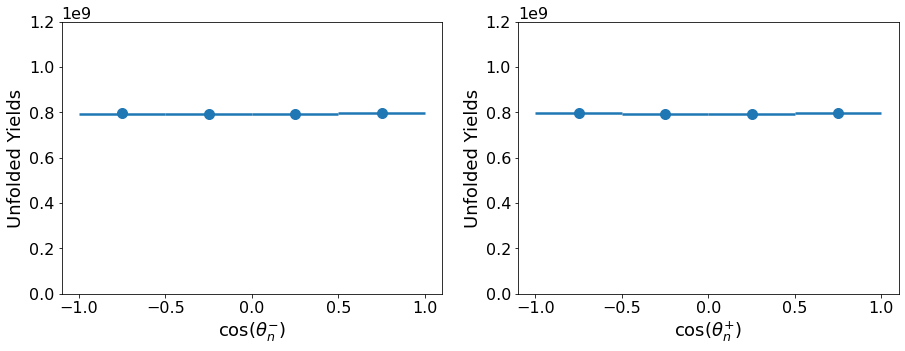

In [10]:
# Plot the result
plt.figure(figsize=(15, 5))

# Binned-like plotting
xEdges = np.array([-1.0, -0.5, 0, 0.5, 1.0])
xUp, xDown = xEdges[1:], xEdges[:-1]
xCenter = (xUp + xDown) / 2

# First observable
plt.subplot(1, 2, 1)
plt.plot(xCenter, Bunf[1], 'o', markersize=10)
plt.hlines(y=Bunf[0], xmin=xDown, xmax=xUp, color='tab:blue')
plt.ylabel('Unfolded Yields')
plt.xlabel('cos($\\theta^{-}_{n}$)')
plt.ylim(0, 1.2e9)

# Second observable
plt.subplot(1, 2, 2)
plt.plot(xCenter, Bunf[1], 'o', markersize=10)
plt.hlines(y=Bunf[1], xmin=xDown, xmax=xUp, color='tab:blue')
plt.xlabel('cos($\\theta^{+}_{n}$)')
plt.ylabel('Unfolded Yields')
plt.ylim(0, 1.2e9);

In [11]:
val, nll = m.profilePOI(iPOI=0, POImin=0.75e9, POImax=0.85e9, nScan=30)

794544544.5445446
1.749366816739891e-05


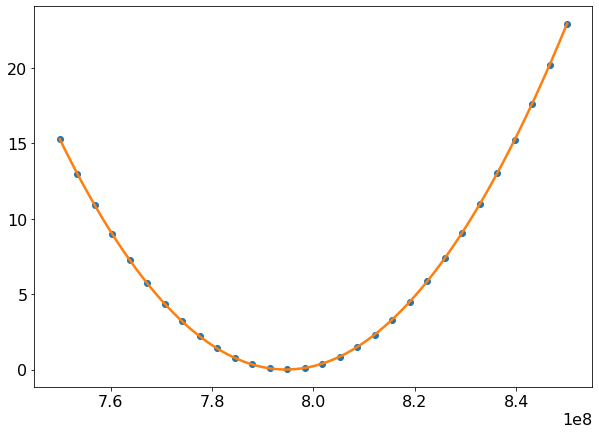

In [12]:
def f(x, a0, a1, a2, a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

p, cov = optimize.curve_fit(f, val, nll)
plt.plot(val, nll, 'o')

v = np.linspace(val.min(), val.max(), 1000)
n = f(v, *p)
plt.plot(v, n);

iM = np.argmin(n)
print(v[iM])

# Comparing with direct unfolding
Bs, _ = m.unfold()
b1 = Bs[0]
print((b1[0]-v[iM])/b1[0])

In [13]:
postFitPOIs = m.postFitUncerPOIs()

In [14]:
for m1, m2 in zip(postFitPOIs, np.concatenate([b1, b2])):
    print((m1[0] - m2)/m1[0])

[ 1.02592076e-04 -6.76362075e+01 -6.86167247e+01]
[ 3.13583445e-03 -6.74279959e+01 -6.84055387e+01]


In [15]:
def plotResult(xEdges, postFitPOIs):
    
    '''
    This function plot the post-fit unfolded bins 
    versus the unfolded observables values.
    
    xEdges: 1D array with edges of observable values
    postFitPOIs: 2D array of shape (N, 3) with N POI measurment
                 with central value, negative and positive error.
    '''
    
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{-}_{n}$)', 'cos($\\theta^{+}_{n}$)']
    
    for i, distri in enumerate(postFitPOIs):
    
        # y-data
        vals = distri[:, 0]
        errn = distri[:, 1]
        errp = distri[:, 2]

        # Plot
        plt.subplot(1, 2, i+1)
        plt.plot(xCenter, vals, 'o', markersize=10)
        plt.hlines(y=vals, xmin=xDown, xmax=xUp, color='tab:blue')
        plt.vlines(x=xCenter, ymin=vals-errn, ymax=vals+errp, color='tab:blue')
        plt.ylabel('Unfolded Yields')
        plt.xlabel(xlabels[i])
        plt.ylim(7e8, 9e8)

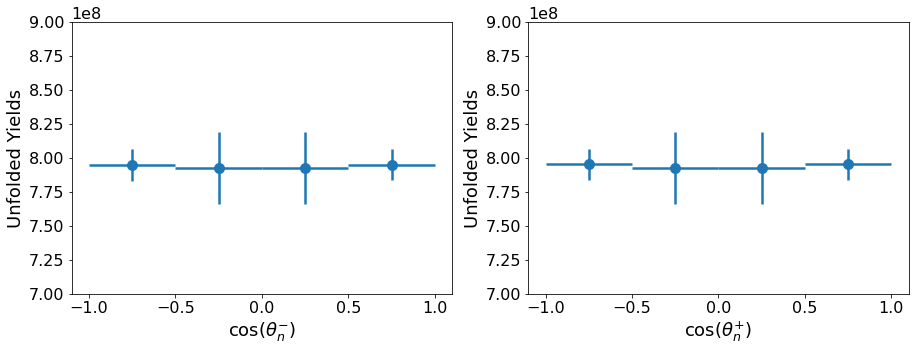

In [16]:
Xs = np.array([-1.0, -0.5, 0, 0.5, 1.0])
plotResult(Xs, postFitPOIs)